In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix



In [2]:
df=pd.read_csv('telecom_customer.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#only 3 variables are numerical

In [7]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.isnull().all()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [12]:
# check the distribution of the target variable
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
dict = {}
for i in list(df.columns):
  dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict , index=['count']).transpose()

,count
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [14]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [15]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [16]:
 num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
#Checking for missing or null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
#Replace null values with median value
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [22]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


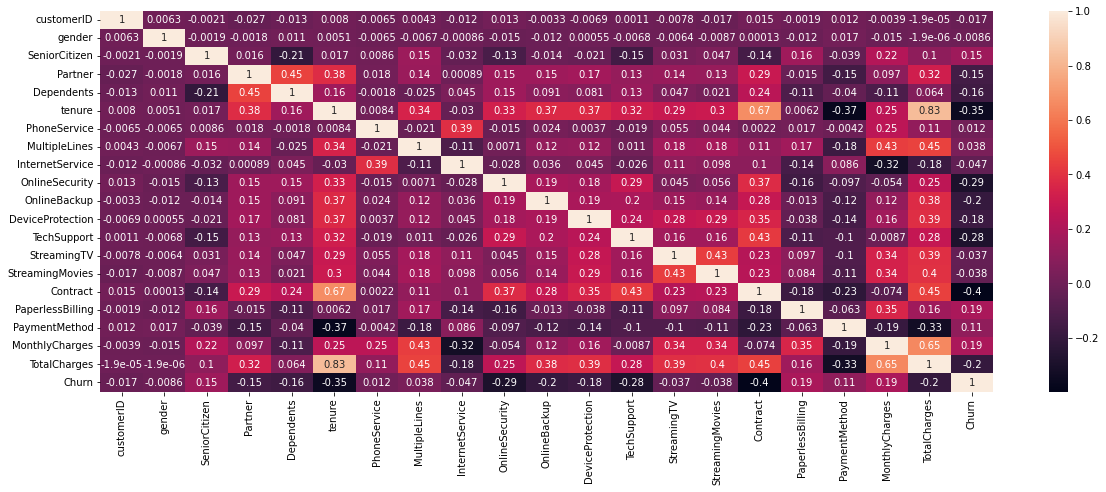

In [24]:
# The 2D correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap of corr
fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
#Modeling
X =df.drop(['Churn'], axis = 1).values
y = df['Churn'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
# Specify hyperparameters for the Decision Tree classifier
hyperparameters = {
    'criterion': 'gini',       # Criterion for splitting ('gini' or 'entropy')
    'max_depth': 5,            # Maximum depth of the tree
    'min_samples_split': 2,    # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,     # Minimum number of samples required to be at a leaf node
    'random_state': 42         # Random seed for reproducibility
}

# Train a Decision Tree classifier on the training data with specified hyperparameters
clf = DecisionTreeClassifier(**hyperparameters)
clf.fit(X_train, y_train)
# Make predictions
predictions = clf.predict(X_test)


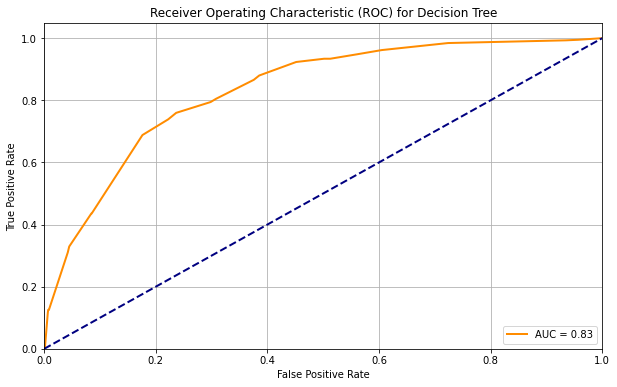

In [30]:

# Make probability estimates for class 1 on the test data
prob_estimates = clf.predict_proba(X_test)[:, 1]  # Probability estimates for class 1
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, prob_estimates)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [31]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1409  130]
 [ 324  250]]


<AxesSubplot:>

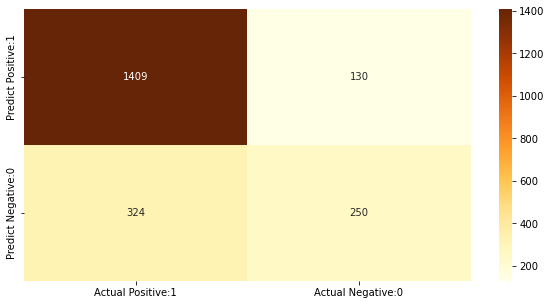

In [32]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize = (10,5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="YlOrBr")

In [33]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, predictions))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.44      0.52       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



In [34]:
from sklearn.utils import resample
from collections import defaultdict
# Number of bootstrap samples
S = 100

# Initialize lists to store probability estimates
label_probs = []

# Perform bootstrapping and classification tree fitting
for _ in range(S):
    # Create a bootstrapped sample
    bootstrap_X, bootstrap_y = resample(X, y, random_state=np.random.randint(0, 100))
    
    # Initialize a DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    
    # Train the classifier on the bootstrapped data
    clf.fit(bootstrap_X, bootstrap_y)
    
    # Predict probabilities for the positive class (class 1)
    probs = clf.predict_proba(bootstrap_X)[:, 1]
    
    # Store the probabilities
    label_probs.append(probs)
 
    
# Calculate the mean probability estimate for each sample
mean_probs = np.mean(label_probs, axis=0)

print("Mean Probability Estimates:")
print(mean_probs)



Mean Probability Estimates:
[0.3  0.28 0.33 ... 0.27 0.18 0.2 ]


In [35]:
from sklearn.ensemble import BaggingClassifier
# Create a BaggingClassifier with Decision Tree base estimator
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                 n_estimators=50,  # Number of base estimators
                                 max_samples=0.8,   # Sample size for each base estimator
                                 random_state=42)

# Train the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Make predictions using the BaggingClassifier
bagging_predictions = bagging_clf.predict(X_test)

# Evaluate the BaggingClassifier
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f'Bagging Accuracy: {bagging_accuracy:.2f}')

print(classification_report(y_test, bagging_predictions))


Bagging Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.49      0.56       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [36]:
# Make probability estimates for class 1 on the test data
prob_estimates = clf.predict_proba(X_test)[:, 1]  # Probability estimates for class 1

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_test, prob_estimates)

print(f'AUC-ROC Score: {auc_score:.4f}')

AUC-ROC Score: 0.8786


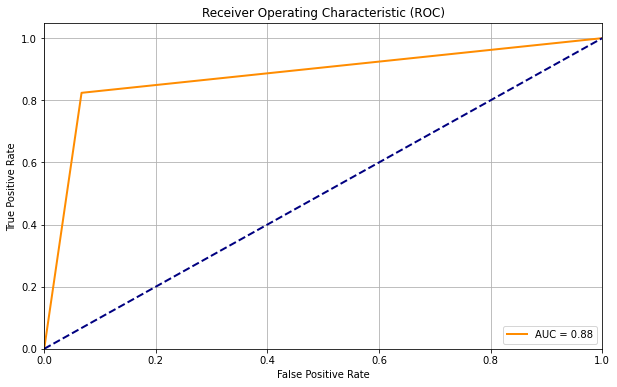

In [37]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, prob_estimates)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [38]:
# Train the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Predictions from each base estimator
base_predictions = np.array([estimator.predict(X_test) for estimator in bagging_clf.estimators_])

# Calculate standard deviation of predictions for each instance
std_per_instance = np.std(base_predictions, axis=0)

# Overall standard deviation across instances
overall_std = np.mean(std_per_instance)

print(f'Overall Standard Deviation: {overall_std:.2f}')

Overall Standard Deviation: 0.32


In [39]:
std_per_instance

array([0.45825757, 0.42708313, 0.        , ..., 0.        , 0.49638695,
       0.3       ])

In [40]:
# Calculate mean prediction for each instance
mean_per_instance = np.mean(base_predictions, axis=0)




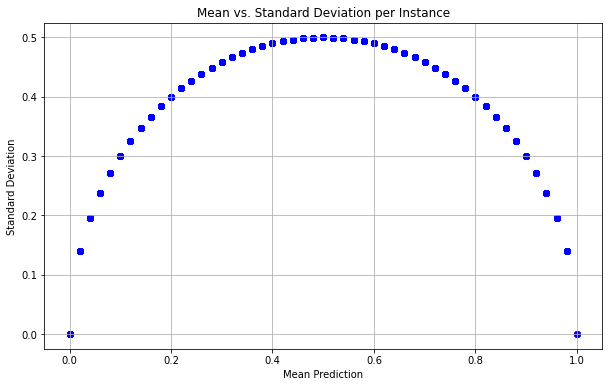

In [41]:
# Plot scatter diagram for Mean vs. Standard Deviation per instance
plt.figure(figsize=(10, 6))
plt.scatter(mean_per_instance, std_per_instance, color='b', alpha=0.7)
plt.title('Mean vs. Standard Deviation per Instance')
plt.xlabel('Mean Prediction')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()






In [42]:
instance_accuracies = []

for instance_idx in range(len(X_test)):
    instance_predictions = base_predictions[:, instance_idx]
    accuracy = (instance_predictions == y_test[instance_idx]).mean()
    instance_accuracies.append(accuracy)

# Print accuracy for each instance
for instance_idx, instance_accuracy in enumerate(instance_accuracies):
    print(f'Accuracy for Instance {instance_idx + 1}: {instance_accuracy:.2f}')

Accuracy for Instance 1: 0.70
Accuracy for Instance 2: 0.76
Accuracy for Instance 3: 1.00
Accuracy for Instance 4: 0.84
Accuracy for Instance 5: 1.00
Accuracy for Instance 6: 0.12
Accuracy for Instance 7: 0.98
Accuracy for Instance 8: 1.00
Accuracy for Instance 9: 0.06
Accuracy for Instance 10: 0.70
Accuracy for Instance 11: 0.84
Accuracy for Instance 12: 0.54
Accuracy for Instance 13: 0.94
Accuracy for Instance 14: 0.54
Accuracy for Instance 15: 0.80
Accuracy for Instance 16: 0.82
Accuracy for Instance 17: 0.42
Accuracy for Instance 18: 0.74
Accuracy for Instance 19: 0.64
Accuracy for Instance 20: 0.40
Accuracy for Instance 21: 0.08
Accuracy for Instance 22: 0.50
Accuracy for Instance 23: 0.50
Accuracy for Instance 24: 0.62
Accuracy for Instance 25: 0.72
Accuracy for Instance 26: 0.38
Accuracy for Instance 27: 0.22
Accuracy for Instance 28: 0.80
Accuracy for Instance 29: 0.34
Accuracy for Instance 30: 1.00
Accuracy for Instance 31: 0.84
Accuracy for Instance 32: 1.00
Accuracy for Inst

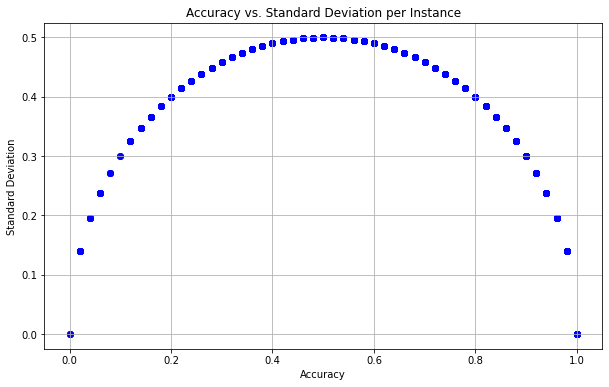

In [43]:
# Plot scatter diagram for Accuracy vs. Standard Deviation per instance
plt.figure(figsize=(10, 6))
plt.scatter(instance_accuracies, std_per_instance, color='b', alpha=0.7)
plt.title('Accuracy vs. Standard Deviation per Instance')
plt.xlabel('Accuracy')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

In [44]:
# Calculate average accuracy
average_accuracy = sum(instance_accuracies) / len(instance_accuracies)

# Print the average accuracy
print(f'Average Accuracy: {average_accuracy:.2f}')

Average Accuracy: 0.72


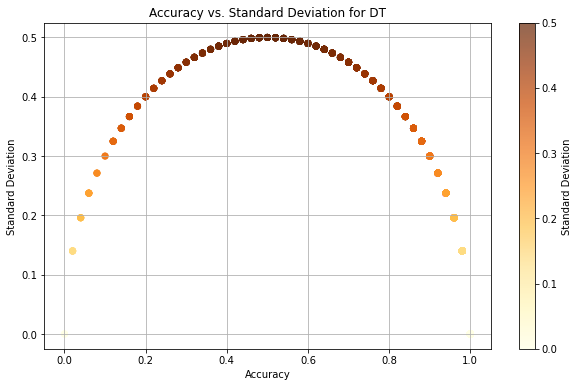

In [45]:
# Plot scatter diagram for Accuracy vs. Standard Deviation per instance with color bar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(instance_accuracies, std_per_instance, c=std_per_instance, cmap='YlOrBr', alpha=0.7)
plt.title('Accuracy vs. Standard Deviation for DT')
plt.xlabel('Accuracy')
plt.ylabel('Standard Deviation')
plt.colorbar(scatter, label='Standard Deviation')
plt.grid(True)
plt.show()

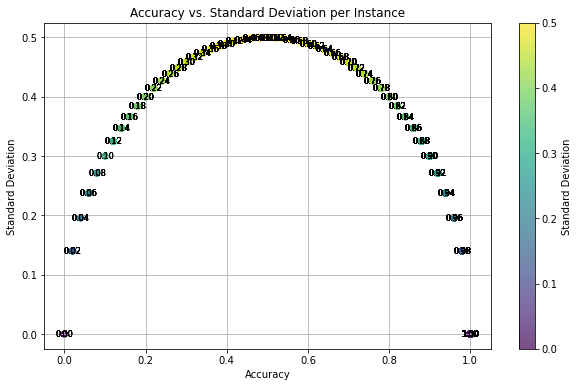

In [46]:
# Plot scatter diagram for Accuracy vs. Standard Deviation per instance with accuracy labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(instance_accuracies, std_per_instance, c=std_per_instance, cmap='viridis', alpha=0.7)
plt.title('Accuracy vs. Standard Deviation per Instance')
plt.xlabel('Accuracy')
plt.ylabel('Standard Deviation')
plt.colorbar(scatter, label='Standard Deviation')

# Add accuracy labels for each point
for instance_idx, (accuracy, std) in enumerate(zip(instance_accuracies, std_per_instance)):
    plt.text(instance_accuracies[instance_idx], std_per_instance[instance_idx], f'{accuracy:.2f}', fontsize=8, ha='center', va='center')

plt.grid(True)
plt.show()

In [47]:
# Number of bootstrap samples
S = 100

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Predict probability estimates for candidate labels 0 and 1
    prob_estimates = clf.predict_proba(X_sample)
    
   




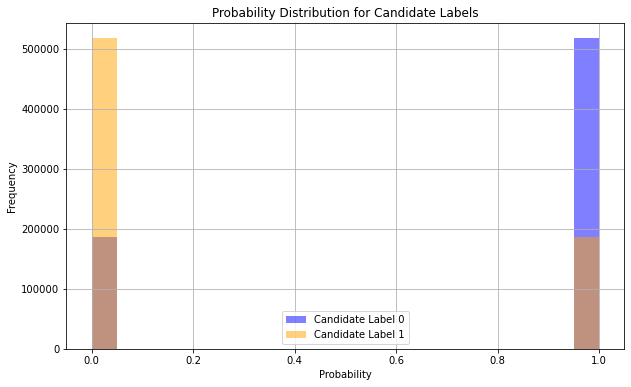

In [48]:
# Number of bootstrap samples
S = 100

# List to store probability estimates for candidate labels
prob_0_estimates = []
prob_1_estimates = []

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Predict probability estimates for candidate labels 0 and 1
    prob_estimates = clf.predict_proba(X_sample)
    
    # Store probability estimates for each sample
    for prob_0, prob_1 in prob_estimates:
        prob_0_estimates.append(prob_0)
        prob_1_estimates.append(prob_1)

# Create histograms for probability distributions
plt.figure(figsize=(10, 6))

plt.hist(prob_0_estimates, bins=20, alpha=0.5, color='blue', label='Candidate Label 0')
plt.hist(prob_1_estimates, bins=20, alpha=0.5, color='orange', label='Candidate Label 1')

plt.title('Probability Distribution for Candidate Labels')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()





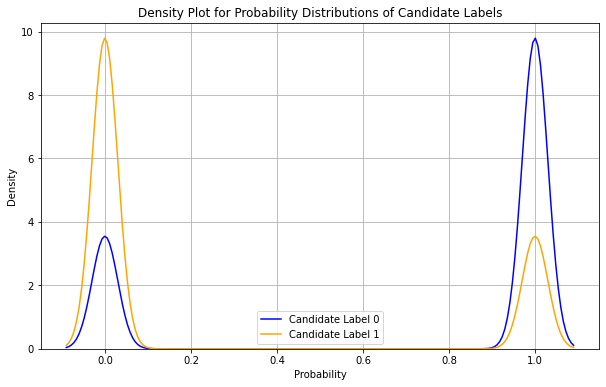

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt



# Number of bootstrap samples
S = 100

# Lists to store probability estimates for candidate labels
prob_0_estimates = []
prob_1_estimates = []

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Predict probability estimates for candidate labels 0 and 1
    prob_estimates = clf.predict_proba(X_sample)
    
    # Store probability estimates for each sample
    for prob_0, prob_1 in prob_estimates:
        prob_0_estimates.append(prob_0)
        prob_1_estimates.append(prob_1)

# Create density plots for probability distributions
plt.figure(figsize=(10, 6))

sns.kdeplot(prob_0_estimates, color='blue', label='Candidate Label 0')
sns.kdeplot(prob_1_estimates, color='orange', label='Candidate Label 1')

plt.title('Density Plot for Probability Distributions of Candidate Labels')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()






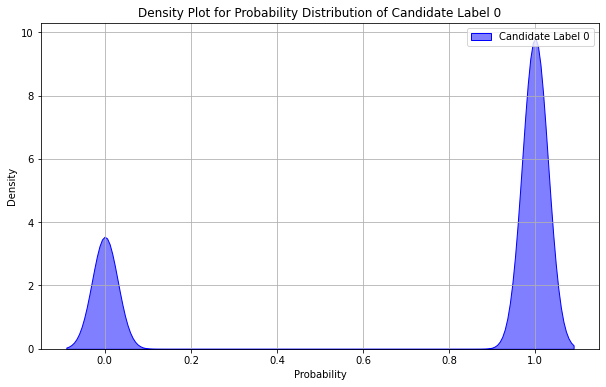

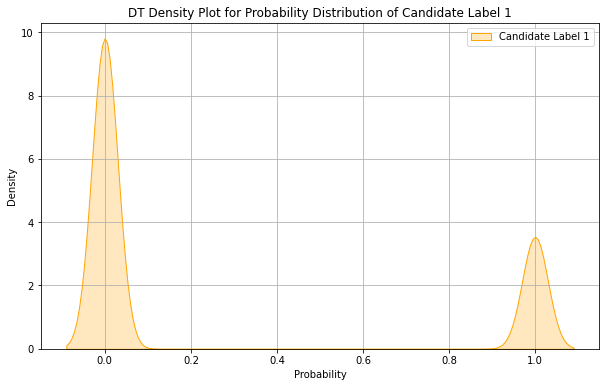

In [50]:
# Number of bootstrap samples
S = 100

# Lists to store probability estimates for candidate labels
prob_0_estimates = []
prob_1_estimates = []

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Predict probability estimates for candidate labels 0 and 1
    prob_estimates = clf.predict_proba(X_sample)
    
    # Store probability estimates for each sample
    for prob_0, prob_1 in prob_estimates:
        prob_0_estimates.append(prob_0)
        prob_1_estimates.append(prob_1)

# Create separate density plots for each candidate label
plt.figure(figsize=(10, 6))

sns.kdeplot(prob_0_estimates, color='blue', label='Candidate Label 0',fill=True, alpha=0.5)
plt.title('Density Plot for Probability Distribution of Candidate Label 0')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(prob_1_estimates, color='orange', label='Candidate Label 1',fill=True)
plt.title('DT Density Plot for Probability Distribution of Candidate Label 1')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


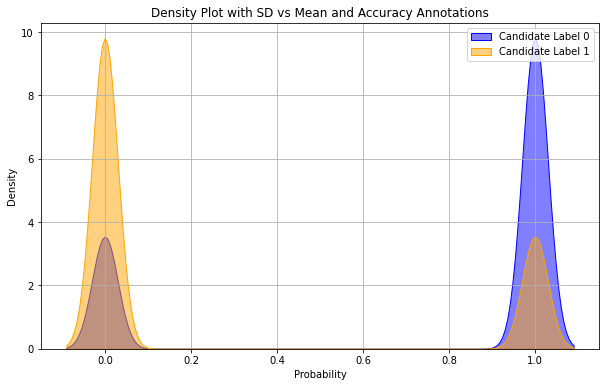

In [51]:
# Number of bootstrap samples
S = 100

# Lists to store probability estimates for candidate labels
prob_0_estimates = []
prob_1_estimates = []

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Predict probability estimates for candidate labels 0 and 1
    prob_estimates = clf.predict_proba(X_sample)
    
    # Store probability estimates for each sample
    for prob_0, prob_1 in prob_estimates:
        prob_0_estimates.append(prob_0)
        prob_1_estimates.append(prob_1)

# Create density plots for probability distributions
plt.figure(figsize=(10, 6))

sns.kdeplot(prob_0_estimates, color='blue', label='Candidate Label 0', fill=True, alpha=0.5)
sns.kdeplot(prob_1_estimates, color='orange', label='Candidate Label 1', fill=True, alpha=0.5)

# Add scatter plot for SD vs Mean with accuracy annotations
# ... your scatter plot code here ...

plt.title('Density Plot with SD vs Mean and Accuracy Annotations')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

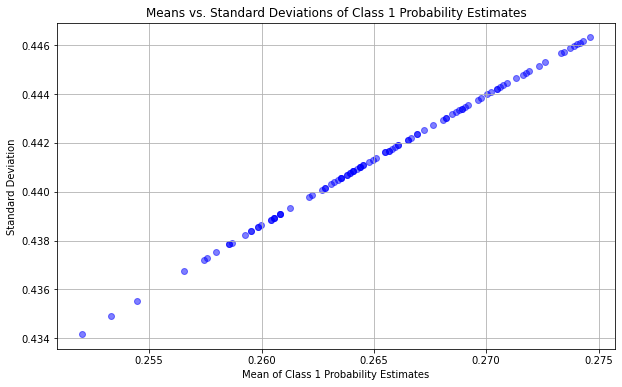

In [52]:
# Lists to store class 1 probability estimates and standard deviations
class_1_prob_estimates = []
std_per_sample = []

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Calculate probability estimates for class 1
    prob_estimates = clf.predict_proba(X_sample)[:, 1]  # Probability estimates for class 1
    
    # Calculate mean and standard deviation for the sample
    sample_mean = np.mean(prob_estimates)
    sample_std = np.std(prob_estimates)
    
    # Store class 1 probability estimates mean and standard deviation
    class_1_prob_estimates.append(sample_mean)
    std_per_sample.append(sample_std)

# Create scatter plot of means vs. standard deviations
plt.figure(figsize=(10, 6))

plt.scatter(class_1_prob_estimates, std_per_sample,color='blue', alpha=0.5)

plt.title('Means vs. Standard Deviations of Class 1 Probability Estimates')
plt.xlabel('Mean of Class 1 Probability Estimates')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()


In [53]:
import lightgbm as lgb
# Define hyperparameters for the LightGBM model
params = {
    'objective': 'binary',        # Binary classification
    'boosting_type': 'gbdt',      # Gradient boosting type
    'metric': 'binary_logloss',   # Loss function to optimize
    'num_leaves': 31,             # Number of leaves in each tree
    'learning_rate': 0.05,        # Learning rate
    'feature_fraction': 0.9,      # Fraction of features to consider per tree
    'bagging_fraction': 0.8,      # Fraction of samples used for bagging
    'bagging_freq': 5,            # Frequency for bagging
    'random_state': 42            # Random seed for reproducibility
}


In [54]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Train the LightGBM model
num_round = 100  # Number of boosting rounds (trees)
bst = lgb.train(params, train_data, num_round)

# Make predictions on the testing data
y_pred_prob = bst.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
Accuracy: 0.8064363464268812


In [55]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred )
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred ))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.54      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



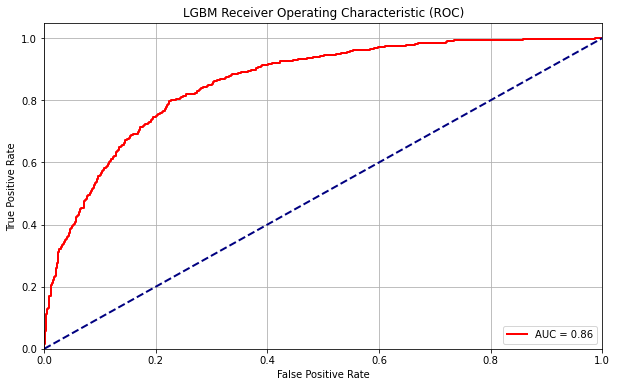

In [56]:
# Make probability predictions on the testing data
y_pred_prob = bst.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [57]:
# Create a BaggingClassifier with Decision Tree base estimator
bagging_clf1 = BaggingClassifier(base_estimator=lgb.LGBMClassifier(random_state=42),
                                 n_estimators=50,  # Number of base estimators
                                 max_samples=0.8,   # Sample size for each base estimator
                                 random_state=42)

# Train the BaggingClassifier
bagging_clf1.fit(X_train, y_train)

# Make predictions using the BaggingClassifier
bagging_predictions1 = bagging_clf1.predict(X_test)

# Evaluate the BaggingClassifier
bagging_accuracy1 = accuracy_score(y_test, bagging_predictions1)
print(f'Bagging Accuracy: {bagging_accuracy1:.2f}')

print(classification_report(y_test, bagging_predictions1))


Bagging Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.52      0.59       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [58]:
# Predictions from each base estimator
base_predictions1 = np.array([estimator.predict(X_test) for estimator in bagging_clf1.estimators_])

# Calculate standard deviation of predictions for each instance
std_per_instance1 = np.std(base_predictions1, axis=0)

# Overall standard deviation across instances
overall_std1 = np.mean(std_per_instance1)

print(f'Overall Standard Deviation: {overall_std1:.2f}')

Overall Standard Deviation: 0.15


In [59]:
# Calculate mean prediction for each instance
mean_per_instance1 = np.mean(base_predictions1, axis=0)


    

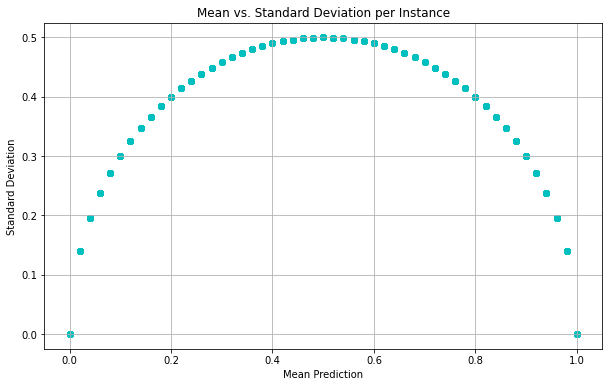

In [60]:
# Plot scatter diagram for Mean vs. Standard Deviation per instance
plt.figure(figsize=(10, 6))
plt.scatter(mean_per_instance1, std_per_instance1, color='c', alpha=0.7)
plt.title('Mean vs. Standard Deviation per Instance')
plt.xlabel('Mean Prediction')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

In [61]:
instance_accuracies1 = []

for instance_idx1 in range(len(X_test)):
    instance_predictions1 = base_predictions1[:, instance_idx1]
    accuracy1 = (instance_predictions1 == y_test[instance_idx1]).mean()
    instance_accuracies1.append(accuracy1)


   

In [62]:
# Calculate average accuracy
average_accuracy1 = sum(instance_accuracies1) / len(instance_accuracies1)



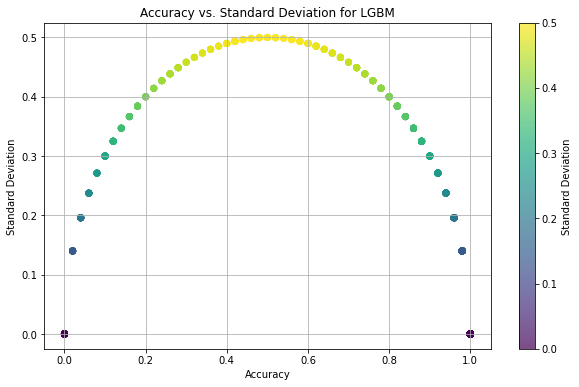

In [63]:
# Plot scatter diagram for Accuracy vs. Standard Deviation per instance with color bar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(instance_accuracies1, std_per_instance1, c=std_per_instance1, cmap='viridis', alpha=0.7)
plt.title('Accuracy vs. Standard Deviation for LGBM')
plt.xlabel('Accuracy')
plt.ylabel('Standard Deviation')
plt.colorbar(scatter, label='Standard Deviation')
plt.grid(True)
plt.show()

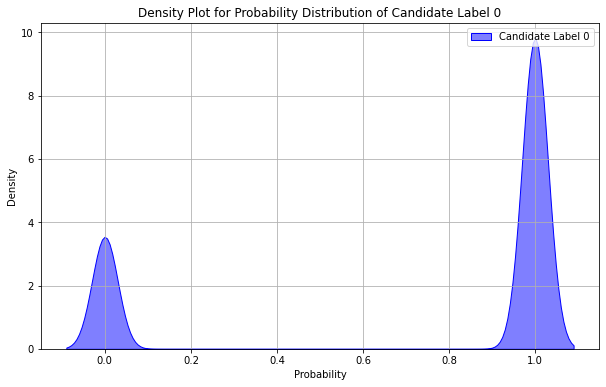

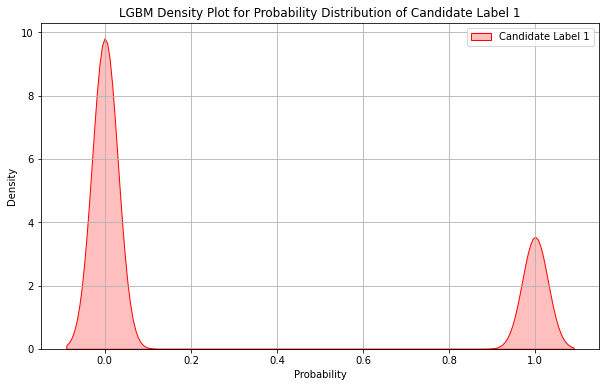

In [64]:
# Number of bootstrap samples
S = 100

# Lists to store probability estimates for candidate labels
prob_0_estimates = []
prob_1_estimates = []

for s in range(S):
    # Create a random sample with replacement
    sample_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    # Train a Decision Tree classifier on the bootstrap sample
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_sample, y_sample)
    
    # Predict probability estimates for candidate labels 0 and 1
    prob_estimates = clf.predict_proba(X_sample)
    
    # Store probability estimates for each sample
    for prob_0, prob_1 in prob_estimates:
        prob_0_estimates.append(prob_0)
        prob_1_estimates.append(prob_1)

# Create separate density plots for each candidate label
plt.figure(figsize=(10, 6))

sns.kdeplot(prob_0_estimates, color='blue', label='Candidate Label 0',fill=True, alpha=0.5)
plt.title('Density Plot for Probability Distribution of Candidate Label 0')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(prob_1_estimates, color='red', label='Candidate Label 1',fill=True)
plt.title('LGBM Density Plot for Probability Distribution of Candidate Label 1')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[1395  144]
 [ 265  309]]


In [66]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8064363464268812
Precision: 0.6821192052980133
Recall: 0.5383275261324042
F1-Score: 0.6017526777020448


<AxesSubplot:>

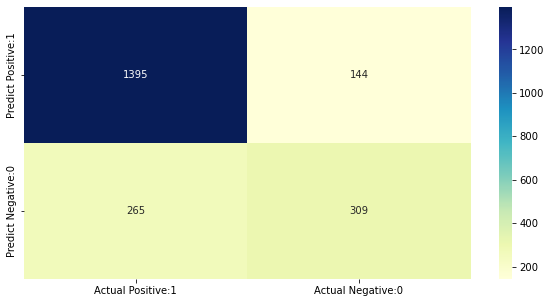

In [67]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize = (10,5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')